
# Lesson 2 - Accounts and Addresses



## 1. Setup

### Step 1 - Copy content of lab-1 into lab-2

In [ ]:
cp -rp ~/github/suss/fin579/lab-1/. ~/github/suss/fin579/lab-2
cd ~/github/suss/fin579/lab-2

## 2. Lab 2a - Create a new Metamask Wallet

### Step 1: Download and Install Metamask Plugin

Download and install the Metamask plugin for your browser from [here](https://metamask.io/download/). Follow the instructions on the page to install the plugin, create a wallet, and generate a new passphrase.

**NOTE:** If you already have the Metamask plugin installed, do not use your existing passphrase for this course. It is recommended that you create a new browser profile and install a new Metamask plugin there, generating a new passphrase for exclusive use in this course.

### Step 2: Update hardhat.config.js

With the passphrase you created in **Step 2**, add it to the `accounts.mnemonic` property in the `hardhat.config.js` file.

```js
require("@nomiclabs/hardhat-ethers");
module.exports = {
    solidity: "0.8.8",
    networks: {
        hardhat: {
            accounts: {
                mnemonic: "Enter your own passphrase...",
            },
        },
    },
};
```

### Step 3: Run the Hardhat Network

Upon running the network, you should see a list of 20 accounts that have been generated using the same mnemonic as your Metamask. Compare the address of Account #0 with the address in Metamask. They should match. If they don't, revisit your passphrase to ensure you've entered it correctly.

In [ ]:
hh node

### Step 4: Connect Metamask to the HH Network

* Click on the Networks button at the top of Metamask. Select `Localhost 8545`

* Once you are connected, you should see `10000 ETH` in the wallet and Account 1 address should match the Account #0 in HH network.

![metamask](./img/metamask.png)

### Step 5. Add a new account in Metamask.

* Click on `Create Account`. This should create an account `Account 2` in your metamask wallet.

* Compare `Account 2` with the Account #1 in HH network. They should be the same.

This shows that the account created in Metamask matches the accounts HH network since they are using the same HD passphrase.

### Step 6: Obtain the List of Accounts Using Hardhat Console

In Step 4, we retrieved the list of accounts directly from the local network. In Step 6, we obtained the list from Metamask. Now, in this step, we will obtain the list programmatically using Javascript, by calling the local network provider's API.

- **Run the Hardhat console**

  In your terminal, run:

  ```zsh
  hh console --network localhost
  ```

- **Enter the following commands within the console**

  This set of commands will import the `ethers` object from the Hardhat-Ethers plugin, get a list of accounts' signers, and map them to return their respective addresses.

  ```cli
  > const { ethers } = require('hardhat');
  > const accounts = await ethers.getSigners();
  > accounts.map( a => a.address)
  ```
  
  The last line of code accounts.map( a => a.address) is using the map() function to transform the accounts array.

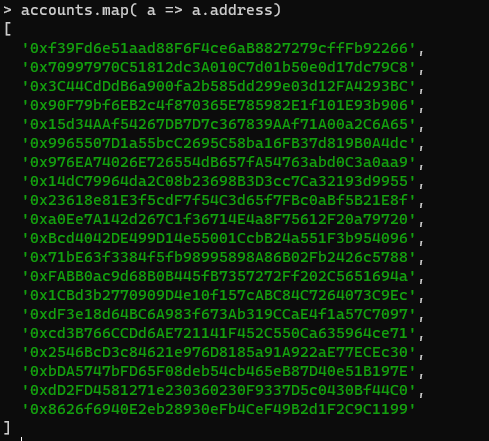

## Lab 2b: Managing Passphrase Using Environment Variable

You may have noticed that you're saving your HD passphrase in the clear in the `hardhat.config.js` file. This means anyone gaining access to this file will control your account. The standard practice is to read the secret from environment variables. In this session, we'll use the `.env` file to store the secrets and access the secret as an environment variable using `dotenv`. We do this for three reasons:

- It's easier to **standardize** the process so that the team knows where to keep the secret to avoid any hardcoding or softcoding or keeping secrets in unknown locations.
- Sensitive data is isolated from non-sensitive data to prevent human error in accidental exposure. **The `.env` file must not be checked into source control.**
- Sensitive data can be accessed consistently **regardless of the environment**. For production, the secrets will be provided by the infrastructure instead of the `.env` file.

For example, if you are writing for a course like this one, you are more likely to sleep better knowing that you won't accidentally include your private key into the course material :)

### Step 1: Install the `dotenv` library.

In [ ]:
cd ~/github/suss/fin579/lab-2

In [ ]:
npm i dotenv

### Step 2. Create `.env` file at the lab directory.

```.env
FIN579_MNEMONIC=replace this with your passphrase
```

### Step 3. Import and load the environment variables at the top of `hardhat.config.js`

```js
require("dotenv").config();
```

### Step 4. Replace the mnemonic in `hardhat.config.js` with `process.env.FIN579_MNEMONIC`

```js
require("@nomiclabs/hardhat-ethers");
require("dotenv").config();
module.exports = {
    solidity: "0.8.8",
    networks: {
        hardhat: {
            accounts: {
                mnemonic: process.env.FIN579_MNEMONIC,
            },
        },
    },
};
```

### Step 5. Restart the HH Network

 Make sure you stop the kernel that was running from Step 3 and restart the node below.
 Check the accounts again to confirm they are still the same.

In [ ]:
hh node